In [3]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split



from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [5]:
 !unzip /content/drive/MyDrive/train.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/train/dog.5499.jpg  
  inflating: /content/train/train/dog.55.jpg  
  inflating: /content/train/train/dog.550.jpg  
  inflating: /content/train/train/dog.5500.jpg  
  inflating: /content/train/train/dog.5501.jpg  
  inflating: /content/train/train/dog.5502.jpg  
  inflating: /content/train/train/dog.5503.jpg  
  inflating: /content/train/train/dog.5504.jpg  
  inflating: /content/train/train/dog.5505.jpg  
  inflating: /content/train/train/dog.5506.jpg  
  inflating: /content/train/train/dog.5507.jpg  
  inflating: /content/train/train/dog.5508.jpg  
  inflating: /content/train/train/dog.5509.jpg  
  inflating: /content/train/train/dog.551.jpg  
  inflating: /content/train/train/dog.5510.jpg  
  inflating: /content/train/train/dog.5511.jpg  
  inflating: /content/train/train/dog.5512.jpg  
  inflating: /content/train/train/dog.5513.jpg  
  inflating: /content/train/train/dog.5514.jpg  
  inflating: /content/

In [6]:
print(os.listdir('/content/train'))

['cat.11745.jpg', 'cat.1863.jpg', 'dog.11256.jpg', 'cat.2504.jpg', 'dog.1485.jpg', 'cat.8638.jpg', 'dog.859.jpg', 'cat.10149.jpg', 'cat.5557.jpg', 'dog.752.jpg', 'dog.5190.jpg', 'dog.9974.jpg', 'dog.8900.jpg', 'dog.4672.jpg', 'cat.6619.jpg', 'dog.1403.jpg', 'cat.2079.jpg', 'dog.9991.jpg', 'cat.2694.jpg', 'dog.2034.jpg', 'dog.8167.jpg', 'cat.2049.jpg', 'dog.3390.jpg', 'dog.9871.jpg', 'dog.3857.jpg', 'cat.7826.jpg', 'cat.9384.jpg', 'dog.2713.jpg', 'cat.12334.jpg', 'cat.3709.jpg', 'dog.5623.jpg', 'dog.7206.jpg', 'cat.9070.jpg', 'cat.211.jpg', 'cat.9564.jpg', 'dog.11871.jpg', 'cat.976.jpg', 'cat.7858.jpg', 'dog.12309.jpg', 'dog.6173.jpg', 'dog.12110.jpg', 'cat.10625.jpg', 'dog.2705.jpg', 'dog.7953.jpg', 'dog.11453.jpg', 'cat.3913.jpg', 'cat.1999.jpg', 'dog.3019.jpg', 'dog.7632.jpg', 'cat.10410.jpg', 'cat.1963.jpg', 'dog.837.jpg', 'cat.6548.jpg', 'dog.11221.jpg', 'dog.5174.jpg', 'cat.4431.jpg', 'cat.10656.jpg', 'dog.3791.jpg', 'dog.8940.jpg', 'dog.575.jpg', 'dog.9161.jpg', 'cat.11950.jpg', 

In [7]:
image_directory = '/content/train'
cat = '/content/train/cat'
dog = '/content/train/dog'

os.makedirs(cat,exist_ok=True)
os.makedirs(dog,exist_ok=True)



In [8]:
print(len(os.listdir(image_directory)))

25002


In [9]:
for file in os.listdir(image_directory):
  file_path = os.path.join(image_directory,file)
  # print(file_path)
  if os.path.isfile(file_path):
    if file[:3] == 'cat':
      # print("cat")
      shutil.move(file_path,os.path.join(cat,file))
    elif file[:3] == 'dog':
      shutil.move(file_path, os.path.join(dog,file))

In [10]:
print(os.listdir('/content/train/cat'))

['cat.11745.jpg', 'cat.1863.jpg', 'cat.2504.jpg', 'cat.8638.jpg', 'cat.10149.jpg', 'cat.5557.jpg', 'cat.6619.jpg', 'cat.2079.jpg', 'cat.2694.jpg', 'cat.2049.jpg', 'cat.7826.jpg', 'cat.9384.jpg', 'cat.12334.jpg', 'cat.3709.jpg', 'cat.9070.jpg', 'cat.211.jpg', 'cat.9564.jpg', 'cat.976.jpg', 'cat.7858.jpg', 'cat.10625.jpg', 'cat.3913.jpg', 'cat.1999.jpg', 'cat.10410.jpg', 'cat.1963.jpg', 'cat.6548.jpg', 'cat.4431.jpg', 'cat.10656.jpg', 'cat.11950.jpg', 'cat.4594.jpg', 'cat.5576.jpg', 'cat.11767.jpg', 'cat.7359.jpg', 'cat.5074.jpg', 'cat.2227.jpg', 'cat.2928.jpg', 'cat.3533.jpg', 'cat.4113.jpg', 'cat.722.jpg', 'cat.7045.jpg', 'cat.5990.jpg', 'cat.9627.jpg', 'cat.8887.jpg', 'cat.6646.jpg', 'cat.1336.jpg', 'cat.10083.jpg', 'cat.6286.jpg', 'cat.7298.jpg', 'cat.3331.jpg', 'cat.5046.jpg', 'cat.4923.jpg', 'cat.12317.jpg', 'cat.10318.jpg', 'cat.3910.jpg', 'cat.7232.jpg', 'cat.11268.jpg', 'cat.4275.jpg', 'cat.458.jpg', 'cat.5364.jpg', 'cat.2993.jpg', 'cat.2436.jpg', 'cat.4966.jpg', 'cat.5361.jpg',

In [11]:
print(os.listdir('/content/train/dog'))

['dog.11256.jpg', 'dog.1485.jpg', 'dog.859.jpg', 'dog.752.jpg', 'dog.5190.jpg', 'dog.9974.jpg', 'dog.8900.jpg', 'dog.4672.jpg', 'dog.1403.jpg', 'dog.9991.jpg', 'dog.2034.jpg', 'dog.8167.jpg', 'dog.3390.jpg', 'dog.9871.jpg', 'dog.3857.jpg', 'dog.2713.jpg', 'dog.5623.jpg', 'dog.7206.jpg', 'dog.11871.jpg', 'dog.12309.jpg', 'dog.6173.jpg', 'dog.12110.jpg', 'dog.2705.jpg', 'dog.7953.jpg', 'dog.11453.jpg', 'dog.3019.jpg', 'dog.7632.jpg', 'dog.837.jpg', 'dog.11221.jpg', 'dog.5174.jpg', 'dog.3791.jpg', 'dog.8940.jpg', 'dog.575.jpg', 'dog.9161.jpg', 'dog.4178.jpg', 'dog.11377.jpg', 'dog.5342.jpg', 'dog.8758.jpg', 'dog.2943.jpg', 'dog.9109.jpg', 'dog.1570.jpg', 'dog.248.jpg', 'dog.1890.jpg', 'dog.3375.jpg', 'dog.3027.jpg', 'dog.6502.jpg', 'dog.9227.jpg', 'dog.3161.jpg', 'dog.4397.jpg', 'dog.9006.jpg', 'dog.11961.jpg', 'dog.6186.jpg', 'dog.897.jpg', 'dog.11653.jpg', 'dog.8051.jpg', 'dog.3166.jpg', 'dog.12434.jpg', 'dog.12148.jpg', 'dog.8032.jpg', 'dog.3580.jpg', 'dog.98.jpg', 'dog.7489.jpg', 'dog

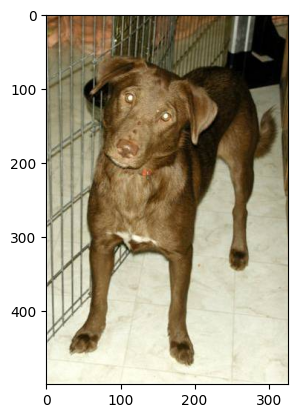

In [12]:
img = mpimg.imread('/content/train/dog/dog.1.jpg')
imgplt = plt.imshow(img)
plt.show()

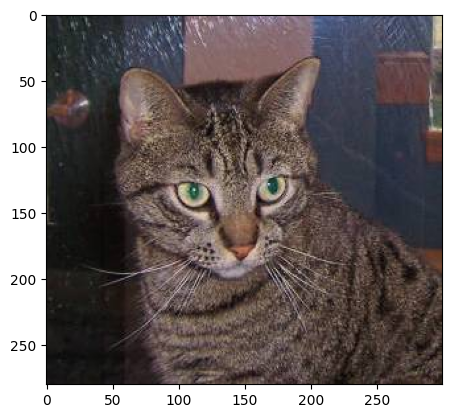

In [13]:
img = mpimg.imread('/content/train/cat/cat.1.jpg')
imgplt = plt.imshow(img)
plt.show()

In [14]:
# Count files in each directory
dog_count = len(os.listdir(dog))
cat_count = len(os.listdir(cat))

print("Number of dogs:", dog_count)
print("Number of cats:", cat_count)

Number of dogs: 12500
Number of cats: 12500


# Creating Dataframe

In [25]:
path_list = []
label =  []

for folder in os.listdir(image_directory):
  for filename in os.listdir(os.path.join(image_directory, folder)):
    if folder == "cat":
      label.append(0)
    else:
      label.append(1)
    path_list.append(os.path.join(image_directory, folder, filename))
print(path_list[0],label[0])

/content/train/dog/dog.11256.jpg 1


In [26]:
df = pd.DataFrame()
df['images'] = path_list
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,/content/train/cat/cat.11040.jpg,0
1,/content/train/dog/dog.7385.jpg,1
2,/content/train/cat/cat.12471.jpg,0
3,/content/train/dog/dog.4013.jpg,1
4,/content/train/dog/dog.3898.jpg,1


In [27]:
df['label'] = df['label'].astype('str')

In [28]:


# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)



# Data Augmentation

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_generator = ImageDataGenerator(rescale = 1./255)


val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [40]:
# Usage example
for batch_x, batch_y in train_iterator:
    print(f"Batch shape: {batch_x.shape}")
    print(f"Label shape: {batch_y.shape}")
    print(f"Min pixel value: {batch_x.min()}")
    print(f"Max pixel value: {batch_x.max()}")
    break

Batch shape: (512, 128, 128, 3)
Label shape: (512,)
Min pixel value: 0.0
Max pixel value: 1.0


# Model

In [41]:
model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.5177 - loss: 0.8292 - val_accuracy: 0.6338 - val_loss: 0.6510
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.6211 - loss: 0.6437 - val_accuracy: 0.6834 - val_loss: 0.5946
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.6821 - loss: 0.5967 - val_accuracy: 0.7156 - val_loss: 0.5599
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.7165 - loss: 0.5603 - val_accuracy: 0.7376 - val_loss: 0.5141
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.7359 - loss: 0.5288 - val_accuracy: 0.7660 - val_loss: 0.4757
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.7404 - loss: 0.5174 - val_accuracy: 0.7776 - val_loss: 0.4575
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.7572 - loss: 0.4949 - val_accuracy: 0.7794 - val_loss: 0.4651
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.7590 - loss: 0.4905 - val_accuracy: 0.7990 - v

# Visualization of the result

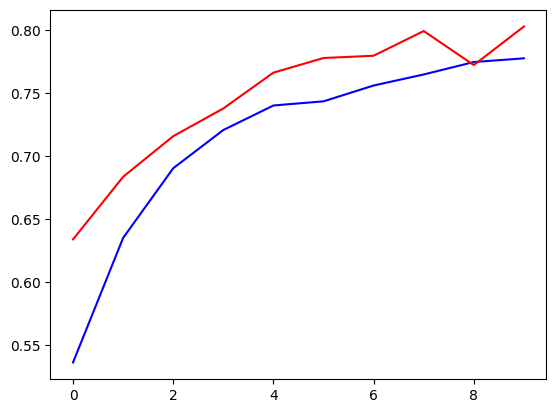

In [44]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'r',label='Training Accuracy')

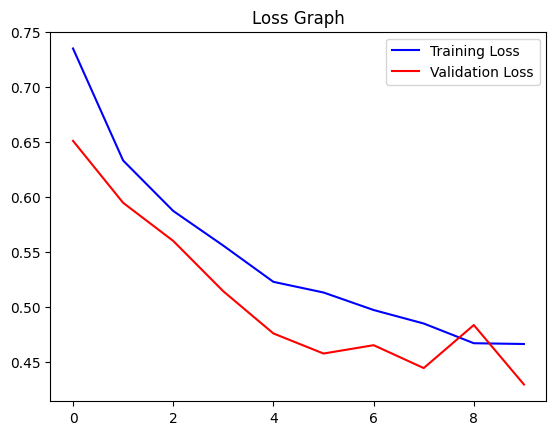

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()